# Proyecto de Clusterización de Series de Tiempo
### Participantes:

1. Adrián Form
2. Kevin Gamboa
3. Rachit Vargas

Repositorio GitHub: <a href="https://github.com/RachitVargas/Time_Series---Clustering">GitHub</a> 

<img src="https://biblioteca.ulead.ac.cr/sites/default/files/LEAD%20color.png" width="320"></img></a>

### Definiendo ruta de trabajo

In [1]:
import os
os.chdir(
    path= "/Users/antony.vargasulead.ac.cr/Economia para ingenieros/Proyecto_SeriesTiempo"
)
os.getcwd()

'/Users/antony.vargasulead.ac.cr/Economia para ingenieros/Proyecto_SeriesTiempo'

### Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, ward, single, complete, average, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
import warnings
warnings.filterwarnings("ignore")

### Datos

In [3]:
df = pd.read_csv("data/db_empresas_bolsa_economía.csv", sep = ";", decimal = ",", index_col=["Empresa"])
columnas = ["v" + str(i+1) for i in range(len(df.columns))]
df.columns = columnas
df.head()


,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v721,v722,v723,v724,v725,v726,v727,v728,v729,v730
Empresa,,,,,,,,,,,,,,,,,,,,,
Aeromexico,22.53000,22.77000,23.16000,23.27000,23.23000,22.97000,22.66000,22.42000,22.75000,22.56000,...,5.27000,5.17000,5.23000,5.31000,5.27000,5.27000,5.28000,5.22000,5.21000,5.68000
Alibaba,136.70000,130.60001,139.75000,143.10001,146.78999,151.92000,151.69000,151.32001,149.27000,150.88001,...,160.19000,163.97000,167.85001,166.81000,166.53999,168.42999,161.58000,143.60001,140.34000,136.62000
Amazon,1539.13001,1500.28003,1575.39002,1629.51001,1656.57996,1659.42004,1656.21997,1640.56006,1617.20996,1674.56006,...,3576.22998,3482.05005,3472.50000,3525.14990,3545.67993,3540.69995,3549.00000,3696.06006,3676.57007,3572.57007
American AIrlines,32.48000,30.06000,32.04000,32.95000,32.42000,33.42000,32.04000,31.80000,31.71000,32.10000,...,22.26000,21.57000,21.33000,20.29000,20.32000,19.84000,19.86000,19.39000,19.28000,19.63000
Apple,39.48000,35.54750,37.06500,36.98250,37.68750,38.32750,38.45000,38.07250,37.50000,38.26750,...,150.81000,147.92000,147.87000,149.99001,150.00000,151.00000,153.49001,157.87000,160.55000,161.02000


### Series de tiempo - Plot

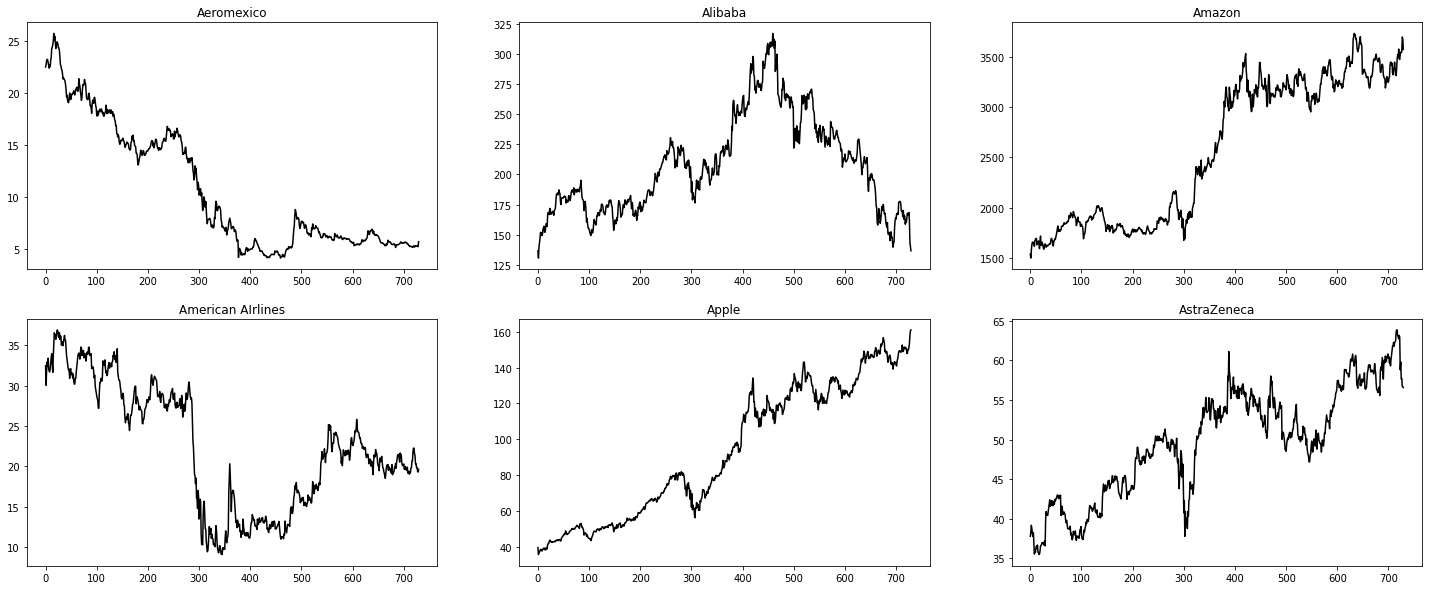

In [4]:
plt.figure(figsize=(25,10))
contador = 0
for i in range(3):
    for j in range(2):
        plt.subplot(2,3,contador+1)
        plt.plot(df.iloc[contador, :].values, color = "black")
        contador += 1
        plt.title(df.index[contador-1])

### Algoritmo del clústering jerárquico

#### 1. Centroides

In [5]:
def centroide(num_cluster, datos, clusters):
    ind = clusters == num_cluster
    return(pd.DataFrame(datos[ind].mean()).T)

#### 2. Calculo de distancia

In [6]:
distancia = pdist(df, metric="euclidean")
distancia.shape

(1225,)

#### 3. Metricas de distancia

In [7]:
average_distancia = average(df)

#### 4. Ploteo de dendogramas

Text(0.5, 1.0, 'Dendograma - Average')

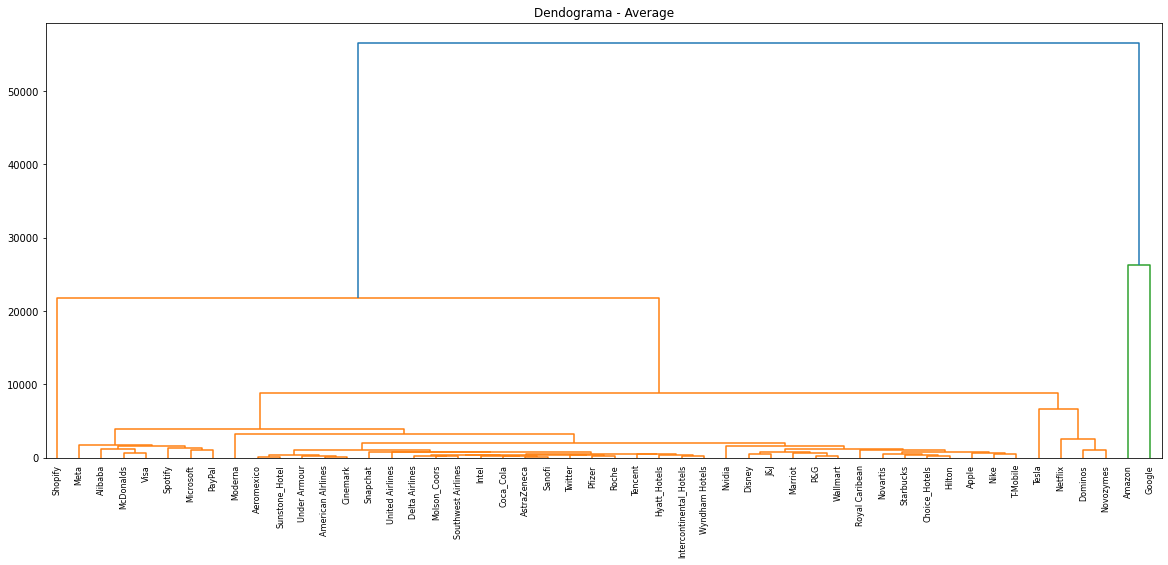

In [8]:
plt.figure(figsize=(20,8))
dendrogram(average_distancia, labels = df.index.tolist())
plt.title("Dendograma - Average")

### PCA

In [9]:
from prince import PCA
import matplotlib.patches as mpatches
import plotly.express as px

class ACP():
    def __init__(self, datos, n_componentes = 5): 
        self.__datos = datos
        self.__modelo = PCA(n_components = n_componentes).fit(self.__datos)
        self.__correlacion_var = self.__modelo.column_correlations(datos)
        self.__coordenadas_ind = self.__modelo.row_coordinates(datos)
        self.__contribucion_ind = self.__modelo.row_contributions(datos)
        self.__cos2_ind = self.__modelo.row_cosine_similarities(datos)
        self.__var_explicada = [x * 100 for x in self.__modelo.explained_inertia_]
    
    @property
    def datos(self):
        return self.__datos
    @datos.setter
    def datos(self, datos):
        self.__datos = datos
    @property
    def modelo(self):
        return self.__modelo
    @property
    def correlacion_var(self):
        return self.__correlacion_var
    @property
    def coordenadas_ind(self):
        return self.__coordenadas_ind
    @property
    def contribucion_ind(self):
        return self.__contribucion_ind
    @property
    def cos2_ind(self):
        return self.__cos2_ind
    @property
    def var_explicada(self):
        return self.__var_explicada
        self.__var_explicada = var_explicada
      
    @datos.setter
    def datos(self, datos):
      self.__datos = datos

    def plot_circulo(self, ejes = [0, 1], var_labels = True, titulo = 'Círculo de Correlación'):
        cor = self.correlacion_var.iloc[:, ejes].values
        c = plt.Circle((0, 0), radius = 1, color = 'steelblue', fill = False)
        plt.figure(figsize=(10,5), dpi=100)
        plt.gca().add_patch(c)
        plt.axis('scaled')
        plt.title(titulo)
        plt.axhline(y = 0, color = 'dimgrey', linestyle = '--')
        plt.axvline(x = 0, color = 'dimgrey', linestyle = '--')
        inercia_x = round(self.var_explicada[ejes[0]], 2)
        inercia_y = round(self.var_explicada[ejes[1]], 2)
        plt.xlabel('Componente ' + str(ejes[0]) + ' (' + str(inercia_x) + '%)')
        plt.ylabel('Componente ' + str(ejes[1]) + ' (' + str(inercia_y) + '%)')
        for i in range(cor.shape[0]):
            plt.arrow(0, 0, cor[i, 0] * 0.95, cor[i, 1] * 0.95, color = 'steelblue', 
                      alpha = 0.5, head_width = 0.05, head_length = 0.05)
            if var_labels:
                plt.text(cor[i, 0] * 1.05, cor[i, 1] * 1.05, self.correlacion_var.index[i], 
                         color = 'steelblue', ha = 'center', va = 'center')
                
    def plot_sobreposicion(self, ejes = [0, 1], ind_labels = True, 
                      var_labels = True, titulo = 'Sobreposición Plano-Círculo'):
        x = self.coordenadas_ind[ejes[0]].values
        y = self.coordenadas_ind[ejes[1]].values
        cor = self.correlacion_var.iloc[:, ejes]
        scale = min((max(x) - min(x)/(max(cor[ejes[0]]) - min(cor[ejes[0]]))), 
                    (max(y) - min(y)/(max(cor[ejes[1]]) - min(cor[ejes[1]])))) * 0.7
        cor = self.correlacion_var.iloc[:, ejes].values
        plt.figure(figsize=(10,5), dpi=100)
        plt.title(titulo)
        plt.axhline(y = 0, color = 'dimgrey', linestyle = '--')
        plt.axvline(x = 0, color = 'dimgrey', linestyle = '--')
        inercia_x = round(self.var_explicada[ejes[0]], 2)
        inercia_y = round(self.var_explicada[ejes[1]], 2)
        plt.xlabel('Componente ' + str(ejes[0]) + ' (' + str(inercia_x) + '%)')
        plt.ylabel('Componente ' + str(ejes[1]) + ' (' + str(inercia_y) + '%)')
        plt.scatter(x, y, color = 'gray')
        if ind_labels:
            for i, txt in enumerate(self.coordenadas_ind.index):
                plt.annotate(txt, (x[i], y[i]))
        for i in range(cor.shape[0]):
            plt.arrow(0, 0, cor[i, 0] * scale, cor[i, 1] * scale, color = 'steelblue', 
                      alpha = 0.5, head_width = 0.05, head_length = 0.05)
            if var_labels:
                plt.text(cor[i, 0] * scale * 1.15, cor[i, 1] * scale * 1.15, 
                         self.correlacion_var.index[i], 
                         color = 'steelblue', ha = 'center', va = 'center')
    
    def plot_sedimentacion(self):
      temp_modelo = PCA(n_components = len(self.__datos.columns)).fit(self.__datos)
      inercia = [x * 100 for x in temp_modelo.explained_inertia_]
      x = temp_modelo.column_correlations(self.__datos).columns
      y = sorted(inercia, reverse=True)
      componentes = ['Componente principal ' + str(i) for i in x]
      fig = px.line(x=x, y=y, labels={
          'x':'Componente principal',
          'y': 'Porcentaje de inercia',
      }, hover_name=componentes)

      fig.add_scatter(x=x, y=y, mode='markers', marker_color='brown', marker_size=11, text=componentes, name='')
      fig.update_traces(line_color='brown')

      fig.update_layout(font_color="black", title='<b>Gráfico de sedimentación</b> \
      <br><sup>Muestra la cantidad óptima de componentes principales a seleccionar</sup>', hoverlabel=dict(
        bgcolor="white",
        font_size=15,
        font_family="Times New Roman",
        font_color="brown"))
      
      fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
      fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
      fig.update_layout(plot_bgcolor='rgb(255, 250, 250)', showlegend=False, paper_bgcolor='rgb(255, 250, 250)')
      fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='LightPink')
      fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightPink')

      fig.add_annotation(x=1, y=-0.146,
            text="<b>Autor: Rachit Vargas</b>",
            font=(dict(color='brown', size=15)),
            showarrow=False,
            yref='paper',
            xref='paper')

      fig.show()
    
    def plot_kmeans(self, kmeans_predict, colores, legend=True, ejes = [0, 1],
                    titulo = 'Plano Principal con Kmeans'):
      
      x = self.coordenadas_ind[ejes[0]].values
      y = self.coordenadas_ind[ejes[1]].values
      inercia_x = round(self.var_explicada[ejes[0]], 2)
      inercia_y = round(self.var_explicada[ejes[1]], 2)
      cluster = ['Cluster ' + str(i) for i in kmeans_predict]

      fig = px.scatter(x=x, y=y,
                      labels={
                          'x':'Componente ' + str(ejes[0]) + ' (' + str(inercia_x) + '%)',
                          'y': 'Componente ' + str(ejes[1]) + ' (' + str(inercia_y) + '%)'}, color=cluster, 
                       hover_name=cluster, title='<b>'+titulo+'</b><br><sup>Muestra los clústers del Kmeans con \
                       la aplicación de la reducción de dimensión</sup>')
      
      fig.update_traces(marker=dict(size=13))
      fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
      fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
      fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='LightPink', zerolinecolor='brown')
      fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightPink', zerolinecolor='brown')
      fig.update_layout(plot_bgcolor='rgb(255, 250, 250)', showlegend=False, paper_bgcolor='rgb(255, 250, 250)')
      
      fig.update_layout(font_color="black", 
                        hoverlabel=dict(bgcolor="white",font_size=15,
                                        font_family="Times New Roman",
                                        font_color="brown"))
      fig.add_annotation(x=1, y=-0.146,
            text="<b>Autor: Rachit Vargas</b>",
            font=(dict(color='brown', size=15)),
            showarrow=False,
            yref='paper',
            xref='paper')

      fig.show()

    def plot_groups(self, X, y, ejes=[0,1]):
      plt.figure(dpi=100)
      ax = self.__modelo.plot_row_coordinates(X, ax=None, figsize=(12, 8), x_component=ejes[0], y_component=ejes[1],
          labels=None, color_labels=y, ellipse_outline=True, ellipse_fill=True, show_points=True)
      plt.legend(fontsize=15)

    def plot_plano_principal(self, ejes = [0, 1], titulo = 'Plano Principal'):
        x = self.coordenadas_ind[ejes[0]].values
        y = self.coordenadas_ind[ejes[1]].values
        inercia_x = round(self.var_explicada[ejes[0]], 2)
        inercia_y = round(self.var_explicada[ejes[1]], 2)

        index_name = [i for i in self.coordenadas_ind.index]

        fig = px.scatter(x=x, y=y,
                      labels={
                          'x':'Componente ' + str(ejes[0]) + ' (' + str(inercia_x) + '%)',
                          'y': 'Componente ' + str(ejes[1]) + ' (' + str(inercia_y) + '%)'}, hover_name=index_name)
        
        fig.update_traces(marker=dict(size=13), marker_color='brown')
        
        fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
        fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
        fig.update_xaxes(showgrid=True, gridwidth=0.5, gridcolor='LightPink', zerolinecolor='brown')
        fig.update_yaxes(showgrid=True, gridwidth=0.5, gridcolor='LightPink', zerolinecolor='brown')
        fig.update_layout(plot_bgcolor='rgb(255, 250, 250)', showlegend=False, paper_bgcolor='rgb(255, 250, 250)')
        fig.update_layout(font_color="black", 
                          title='<b>Plano Principal</b> <br><sup>Muestra las cordenadas de los componentes principales</sup>', 
                          hoverlabel=dict(
                              bgcolor="white",
                              font_size=15,
                              font_family="Times New Roman",
                              font_color="brown"))
        
        fig.add_annotation(x=1, y=-0.146,
            text="<b>Autor: Rachit Vargas</b>",
            font=(dict(color='brown', size=15)),
            showarrow=False,
            yref='paper',
            xref='paper')

        fig.show()

### Instancia del PCA


In [10]:
pca = ACP(datos = df, n_componentes = 2)

### Grafico de sedimentacion

In [11]:
pca.plot_sedimentacion()

### Circulo de correlacion

<Figure size 720x1440 with 0 Axes>

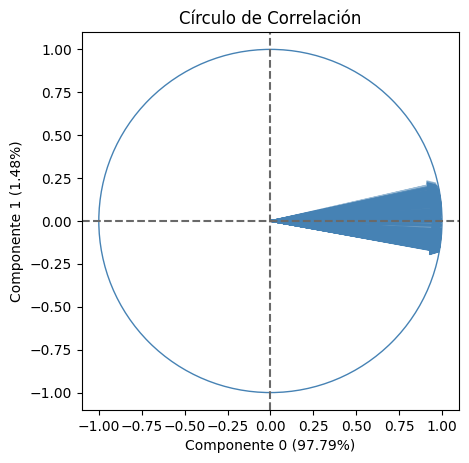

In [12]:
plt.figure(figsize=(10,20))
pca.plot_circulo(ejes=[0,1], var_labels=False)

### Plano principal

In [13]:
pca.plot_plano_principal()

### Matriz traspuesta

In [14]:
df_traspuesta = df.transpose()
df_traspuesta.head()

Empresa,Aeromexico,Alibaba,Amazon,American AIrlines,Apple,AstraZeneca,Choice_Hotels,Cinemark,Coca_Cola,Delta Airlines,...,Sunstone_Hotel,Tencent,Tesla,T-Mobile,Twitter,Under Armour,United Airlines,Visa,Wallmart,Wyndham Hotels
v1,22.53,136.70000,1539.13001,32.48,39.4800,37.80,71.36,36.89,46.93,50.09,...,12.92,39.51,62.024,65.26,28.81,17.81,84.18,132.92000,93.34,45.49
v2,22.77,130.60001,1500.28003,30.06,35.5475,38.33,70.10,37.16,46.64,45.61,...,12.86,38.39,60.072,65.02,27.99,17.38,80.00,128.13001,92.86,44.27
v3,23.16,139.75000,1575.39002,32.04,37.0650,39.18,72.53,38.09,47.57,47.79,...,13.31,40.62,63.538,67.49,29.95,18.13,82.68,133.64999,93.44,46.67
v4,23.27,143.10001,1629.51001,32.95,36.9825,38.78,72.93,39.21,46.95,47.85,...,13.50,40.90,66.992,68.44,31.34,18.67,83.23,136.06000,94.54,47.64
v5,23.23,146.78999,1656.57996,32.42,37.6875,38.13,74.19,40.04,47.48,47.47,...,13.85,40.76,67.070,67.77,31.80,18.87,82.38,136.80000,95.20,48.62


### Similitud entre empresas

In [15]:
matriz_cor = 1 - df_traspuesta.corr()
print(matriz_cor.shape)
print(matriz_cor)

(50, 50)
Empresa                  Aeromexico   Alibaba    Amazon  American AIrlines  \
Empresa                                                                      
Aeromexico                 0.000000  1.585652  1.883819           0.147120   
Alibaba                    1.585652  0.000000  0.473671           1.622823   
Amazon                     1.883819  0.473671  0.000000           1.637751   
American AIrlines          0.147120  1.622823  1.637751           0.000000   
Apple                      1.859134  0.558972  0.036954           1.575368   
AstraZeneca                1.862167  0.592353  0.158304           1.653768   
Choice_Hotels              1.506474  0.966591  0.308567           1.081907   
Cinemark                   0.102186  1.624568  1.759897           0.055633   
Coca_Cola                  1.146781  1.110119  0.773604           0.798877   
Delta Airlines             0.312587  1.473560  1.535920           0.101020   
Disney                     1.441895  0.899195  0.357158

### Distancia

In [16]:
distancia_individuos = pdist(matriz_cor, metric="euclidean")
distancia_individuos

array([7.49232158, 9.93155257, 2.13017963, ..., 1.04171583, 2.42043361,
       3.25023131])

### Ploteo de dendograma

Text(0.5, 1.0, 'Dendograma - Average')

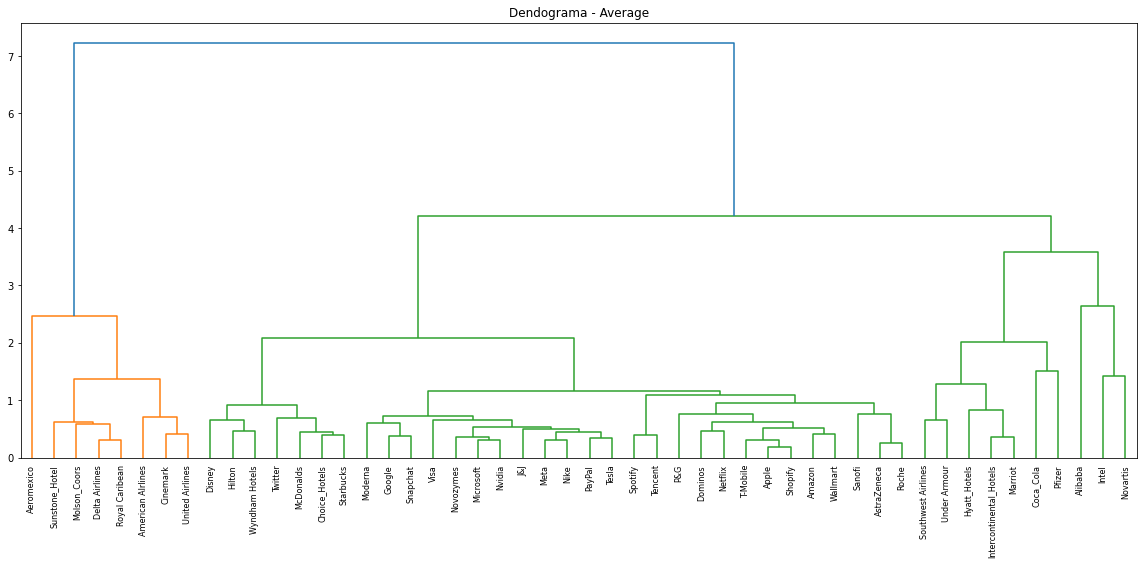

In [17]:
average_distancia_corr = average(matriz_cor)
plt.figure(figsize=(20,8))
dendrogram(average_distancia_corr, labels = df.index.tolist())
#ax = plt.gca()
#limites = ax.get_xbound()
#ax.plot(limites, [4, 4], '--', c='k')
#ax.text(limites[1], 4, ' 3 Clústeres', va='center', fontdict={'size': 15})
plt.title("Dendograma - Average")

### Formacion de clusters

In [18]:
grupos = fcluster(linkage(matriz_cor, method = 'average', metric='euclidean'), 3, criterion = 'maxclust')
grupos = grupos - 1

### Cluster 1

In [19]:
grupo_1 = df[grupos == 0]
grupo_1.index

Index(['Aeromexico', 'American AIrlines', 'Cinemark', 'Delta Airlines',
       'Molson_Coors', 'Royal Caribean', 'Sunstone_Hotel', 'United Airlines'],
      dtype='object', name='Empresa')

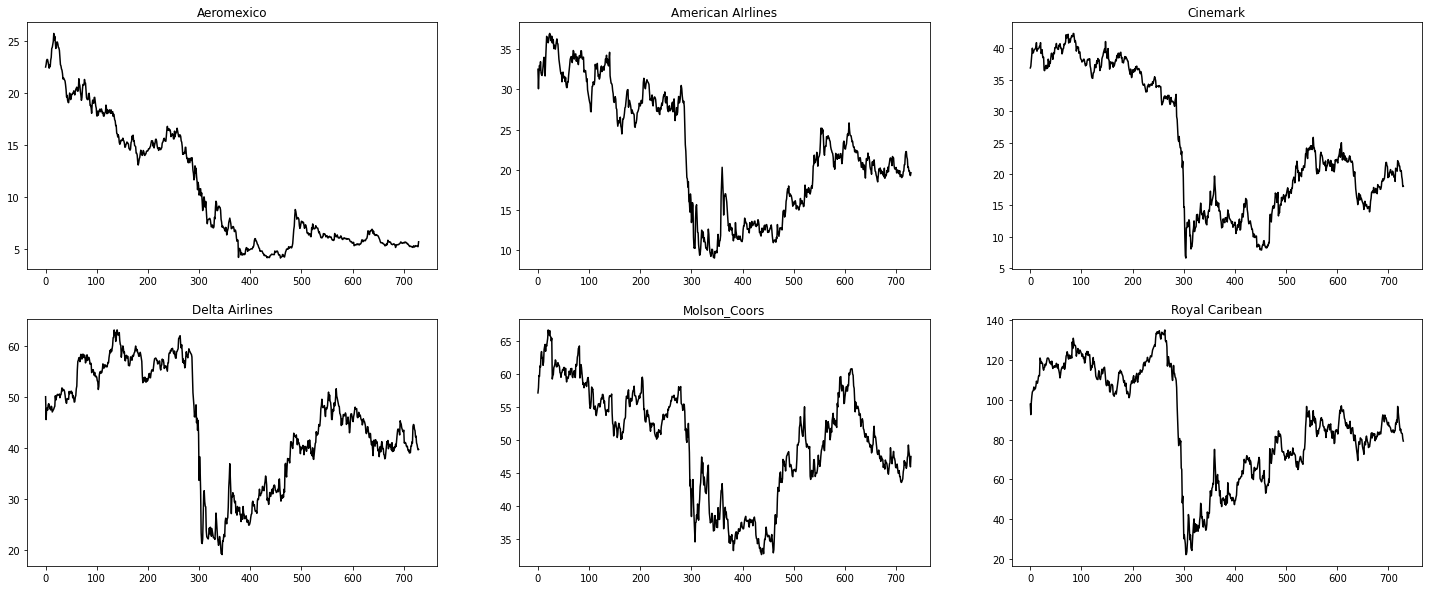

In [20]:
plt.figure(figsize=(25,10))
contador = 0
for i in range(3):
    for j in range(2):
        plt.subplot(2,3,contador+1)
        plt.plot(grupo_1.iloc[contador, :].values, color = "black")
        contador += 1
        plt.title(grupo_1.index[contador-1])

### Cluster 2

In [21]:
grupo_2 = df[grupos == 1]
grupo_2.index

Index(['Amazon', 'Apple', 'AstraZeneca', 'Choice_Hotels', 'Disney', 'Dominos',
       'Google', 'Hilton', 'J&J', 'McDonalds', 'Meta', 'Microsoft', 'Moderna',
       'Netflix', 'Nike', 'Novozymes', 'Nvidia', 'P&G', 'PayPal', 'Roche',
       'Sanofi', 'Shopify', 'Snapchat', 'Spotify', 'Starbucks', 'Tencent',
       'Tesla', 'T-Mobile', 'Twitter', 'Visa', 'Wallmart', 'Wyndham Hotels'],
      dtype='object', name='Empresa')

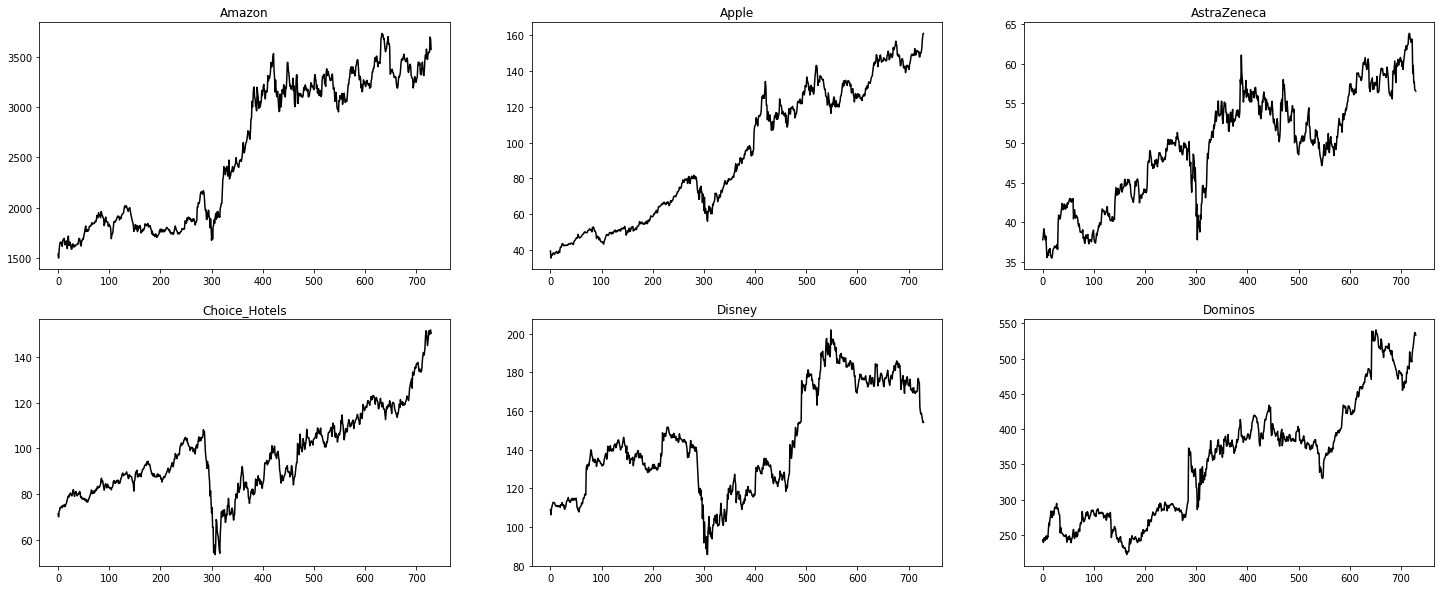

In [22]:
plt.figure(figsize=(25,10))
contador = 0
for i in range(3):
    for j in range(2):
        plt.subplot(2,3,contador+1)
        plt.plot(grupo_2.iloc[contador, :].values, color = "black")
        contador += 1
        plt.title(grupo_2.index[contador-1])

### Cluster 3

In [23]:
grupo_3 = df[grupos == 2]
grupo_3.index

Index(['Alibaba', 'Coca_Cola', 'Hyatt_Hotels', 'Intel',
       'Intercontinental_Hotels', 'Marriot', 'Novartis', 'Pfizer',
       'Southwest Airlines', 'Under Armour'],
      dtype='object', name='Empresa')

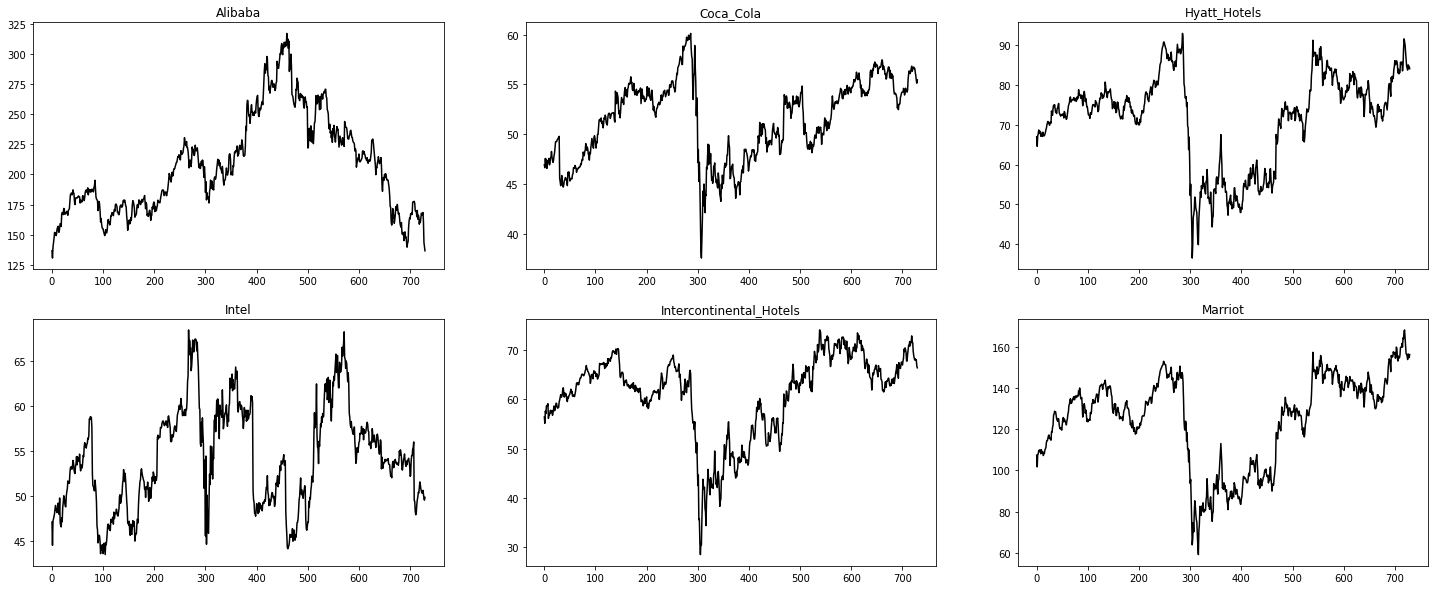

In [24]:
plt.figure(figsize=(25,10))
contador = 0
for i in range(3):
    for j in range(2):
        plt.subplot(2,3,contador+1)
        plt.plot(grupo_3.iloc[contador, :].values, color = "black")
        contador += 1
        plt.title(grupo_3.index[contador-1])

### Centroides

In [25]:
centros = np.array(pd.concat([centroide(0, df, grupos), 
                              centroide(1, df, grupos),
                              centroide(2, df, grupos)]))
print(centros)

[[ 49.24625     47.36        49.4425     ...  34.0925      33.3125
   33.52      ]
 [169.25403125 165.304595   172.97407812 ... 476.93437719 477.82688125
  469.113755  ]
 [ 64.287509    62.199031    65.09084    ...  76.325001    75.755
   75.437     ]]


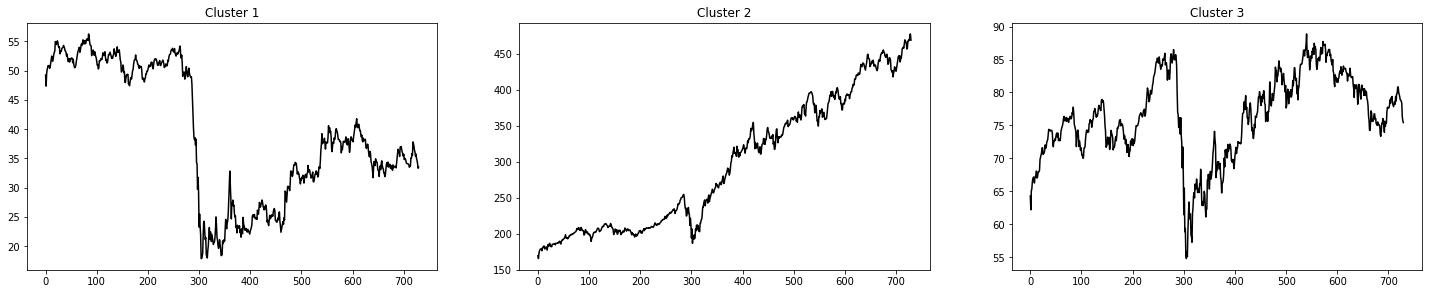

In [26]:
plt.figure(figsize=(25,10))
contador = 0
clusters = ["Cluster " + str(i+1) for i in range(len(centros))]
for i in range(3):
    plt.subplot(2,3,contador+1)
    plt.plot(centros[i], color = "black")
    contador += 1
    plt.title(clusters[contador-1])